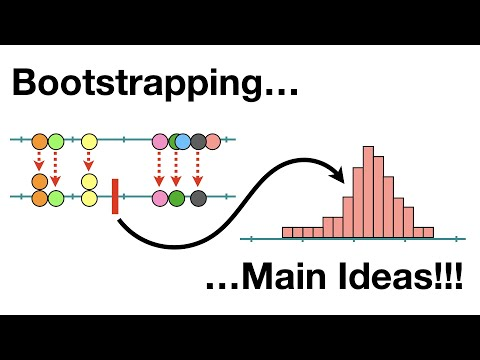

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

In [ ]:
#1 Standered deviation is how the spread of the individual data points is measured in the original data set, it is usefull
# to show how much each data point varies from the mean of the dataset. Standered error of the mean on the other hand, gives
# a quantitive value for the spread of the mean of the samples from that same population, in this example sampling with replacment
# was conducted and after every sample, the mean was calculated and placed into a histogram and repeated many times. in summary
# it is the standered devation of the sample mean distrubution. It is a good way to check if the expierment the data was conducting
# was to be repeted, how likley it is for the experiment/mean to come out different from the original expirement. The standered
# deviation tells you the spread of your data while the standered error of the mean tells you the spread of the mean based on
# your sample.

In [ ]:
#6.1 What is the process of bootstrapping?
# The purpose of bootstrapping is to take data in statistics like a whole dataset or sample of the dataset and create many other
# new samples from that same dataset or sample of the data set, and then you can calculate the mean or any other piece of data
# from the new sample and it will tell you a lot of things about your original dataset's same piece of data. You can sample
# with replacement meaning that when and if a datapoint gets picked from the original dataset, it will be be put back into the
# original dataset and is able to be picked again

# 6.2 What is the main purpose of bootstrapping?
# You can calcuate a mean of a piece of data and compare it to the original dataset, for example
# calcuate the average of the original dataset and then create many other samples and get their average, and see if the average
# of all those sets is somewhat close to the original dataset's average to judge its accuracy. It is very useful if you have
# a small dataset with not many datapoints and if it is too hard, time consuming, or costly to get more/other data points, this 
# is a way to get over that hurdle

# 6.3 If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that
# population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

# I would use bootstraping to collect 1000 new sample of size n from the population, I would picked data using sampling with
# replacment and then calculate the average for every new sample and put all 1000 averages into a histogram, I would then see if 
# the hypothesis lies inside the confidance interval of 95%, if it does, then I can not reject the hypothesis I hypothesized, this
# is called hypothesis testing.
   



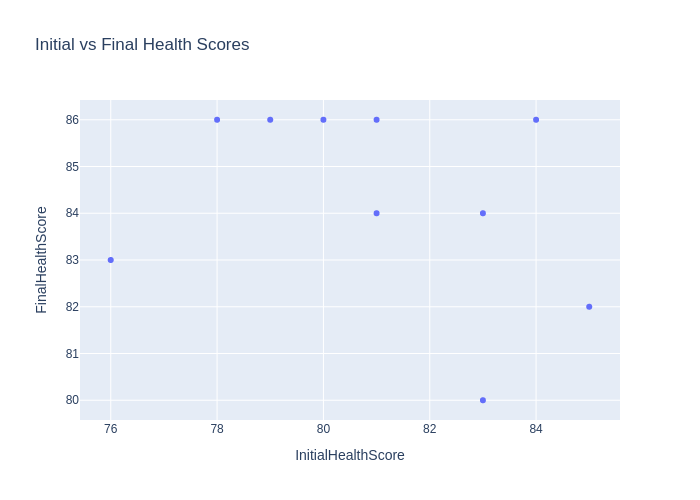

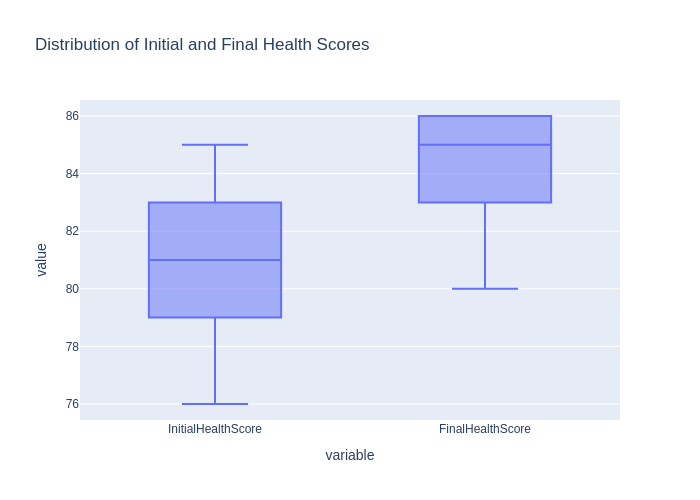

In [5]:
import plotly.express as px
import pandas as pd

# Example data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Scatter plot
fig = px.scatter(data, x='InitialHealthScore', y='FinalHealthScore', title='Initial vs Final Health Scores')
fig.show(renderer="png")

# Boxplot for comparison
fig = px.box(data.melt(value_vars=['InitialHealthScore', 'FinalHealthScore']), x='variable', y='value', title='Distribution of Initial and Final Health Scores')
fig.show(renderer="png")


In [ ]:
8.

# Problem introduction

# Alitech has come out with groundbreaking discovery of a vaccine and we were giving a task to see if the vaccine is acutally
# effective or not, we want to determine if the data given to us represents a positive, negetive, or no impact on the person
# taking the vaccine, We will do this by comparing the initial vs final health scores

# The null hypothesis states that the vaccine has no impact on a persons health, meaning that whenwe compare the
# final and inital health scores, we should not see a difference.

# Scatter plot points shows each persons intital and final health scores and the box plot shows the distrubution.

# Quantitatve analysis

# Bootstrapping will be used since there are not many data points in the dataset and it will require a lot of people and time 
# to get more datapoints. We will calculate the difference in intital vs final health scores in all the bootstrapped
# samples to determine if the vaccine really has an impact on health and if it is positive or negetive. The histogram consists of
# the distrubution of the mean difference values, if the hypothesis is true, we should expect a positive value, if the null
# hypothesis is true, we should expect a value very close to 0 if not 0.

# To be continued after the histogram...





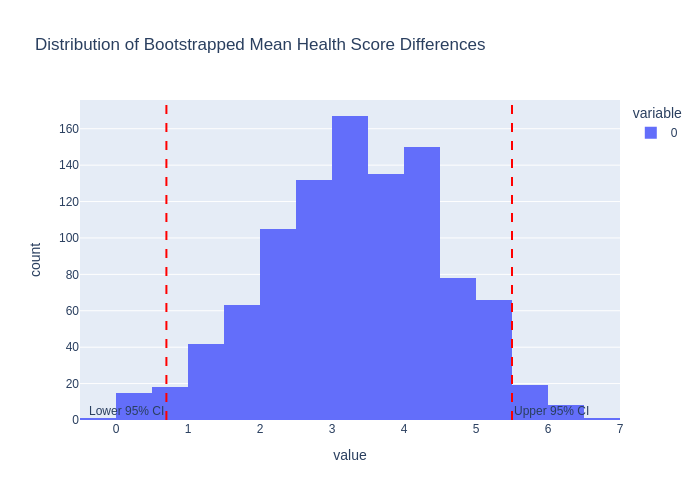

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px

# Example data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the difference in health scores
data['HealthScoreDiff'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function
def bootstrap_mean_diff(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data['HealthScoreDiff'], size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Perform bootstrapping
np.random.seed(42)  # Set seed for reproducibility
boot_means = bootstrap_mean_diff(data)

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Plot bootstrapped means with confidence intervals
fig = px.histogram(boot_means, nbins=30, title="Distribution of Bootstrapped Mean Health Score Differences")

# Add vertical lines for the confidence intervals
fig.add_vline(x=lower_bound, line_dash="dash", line_color="red", annotation_text="Lower 95% CI", annotation_position="bottom left")
fig.add_vline(x=upper_bound, line_dash="dash", line_color="red", annotation_text="Upper 95% CI", annotation_position="bottom right")

# Show the plot as a PNG
fig.show(renderer="png")


In [ ]:
# 8. From looking at the histogram and more specifacly in the confidence intervalm we can see that all the values in the 95%
# confidence interval are bigger then 0 so the null hypothesis is false and Alitech's hypothesis that the vaccine improves
# peoples health is true.

In [ ]:
# Chatbot Summary

# Here’s a comprehensive summary of our entire conversation:

# Bootstrapping Concepts:

# You asked for explanations regarding the process of bootstrapping, its purpose, and how to assess the plausibility of a hypothesized population average using bootstrapping. I provided informal explanations for each question to help a friend with little experience in statistics.
# Vaccine Data Analysis Assignment:

# You shared the details of your assignment involving a vaccine created by AliTech. The assignment required you to analyze the effectiveness of the vaccine using statistical methods, specifically bootstrapping.
# You outlined the deliverables expected for the assignment, including data visualization, quantitative analysis, and a conclusion regarding a null hypothesis of "no effect."
# Plotly Figure Requirements:

# You requested to ensure all Plotly figures are rendered as PNG using fig.show(renderer="png").
# Code Error:

# You encountered a FileNotFoundError when trying to read a CSV file. I explained that this happened because the file was not found in the specified directory.
# Code for Histograms:

# You asked for the code to add confidence intervals to the histogram. I provided the necessary lines to calculate and add 95% confidence intervals.
# After generating two histograms, you requested the entire code to display only one histogram with the confidence intervals. I provided the complete code to accomplish that.
# CSV File Inclusion:

# You asked whether the CSV file was included in the code. I clarified that the sample code used hardcoded data and provided instructions on how to load data from the CSV file instead.
# Summary Request:

# Finally, you requested a summary of our conversation.

In [ ]:
#  Chatbot Transcript link https://chatgpt.com/share/66ff628f-dfec-8000-9c94-0eb45779b4cd